#Predição de Evasão na Indústria de Telefonia*

*Dados adaptados de `https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction/data` com traduções e algum pré-processamento

####A rotatividade de clientes é um dos maiores problemas da indústria de telecomunicações. A pesquisa mostrou a taxa média de rotatividade mensal entre as 4 principais operadoras de telefonia móvel nos EUA é de 1,9% a 2%.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

####Leia o arquivo de dados no notebook python

In [2]:
telecom_cust = pd.read_csv('telecom_churn_trad.csv')

####Dê uma espiada nas primeiras cinco observações

In [3]:
telecom_cust.head()

,IDCliente,Gênero,Idoso,Cônjuge,Dependentes,TempoContrato,LinhaTelefone,MúltiplasLinhas,ServicoInternet,SegurançaOnline,...,ProteçãoDispositivos,SuporteTecnico,StreamingTV,StreamingFilmes,Contrato,FaturaDigital,MétodoPagamento,CobrançaMensal,CobrançaTotal,Evasão
0,7590-VHVEG,Feminino,0,Sim,Não,1,Não,Sem linha de telefone,DSL,Não,...,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,Não
1,5575-GNVDE,Masculino,0,Não,Não,34,Sim,Não,DSL,Sim,...,Sim,Não,Não,Não,Um ano,Não,Fatura por Email,56.95,1889.5,Não
2,3668-QPYBK,Masculino,0,Não,Não,2,Sim,Não,DSL,Sim,...,Não,Não,Não,Não,Mensal,Sim,Fatura por Email,53.85,108.15,Sim
3,7795-CFOCW,Masculino,0,Não,Não,45,Não,Sem linha de telefone,DSL,Sim,...,Sim,Sim,Não,Não,Um ano,Não,Débito Automático,42.30,1840.75,Não
4,9237-HQITU,Feminino,0,Não,Não,2,Sim,Não,Fibra óptica,Não,...,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,Sim


####Liste os nomes das features (colunas)

In [4]:
telecom_cust.columns.values

array(['IDCliente', 'Gênero', 'Idoso', 'Cônjuge', 'Dependentes',
       'TempoContrato', 'LinhaTelefone', 'MúltiplasLinhas',
       'ServicoInternet', 'SegurançaOnline', 'BackupOnline',
       'ProteçãoDispositivos', 'SuporteTecnico', 'StreamingTV',
       'StreamingFilmes', 'Contrato', 'FaturaDigital', 'MétodoPagamento',
       'CobrançaMensal', 'CobrançaTotal', 'Evasão'], dtype=object)

####Explore os dados para ver se há algum valor ausente.

####Começe olhando os tipos de dados das features.

In [5]:
telecom_cust.dtypes

IDCliente                object
Gênero                   object
Idoso                     int64
Cônjuge                  object
Dependentes              object
TempoContrato             int64
LinhaTelefone            object
MúltiplasLinhas          object
ServicoInternet          object
SegurançaOnline          object
BackupOnline             object
ProteçãoDispositivos     object
SuporteTecnico           object
StreamingTV              object
StreamingFilmes          object
Contrato                 object
FaturaDigital            object
MétodoPagamento          object
CobrançaMensal          float64
CobrançaTotal            object
Evasão                   object
dtype: object

####Qual o tipo de `CobrançaTotal`?

####Converta `CobrançaTotal` para um valor numérico.

In [6]:
telecom_cust.CobrançaTotal = pd.to_numeric(telecom_cust.CobrançaTotal, errors='coerce')

####Agora verifique os valores ausentes.

Quantos valores estão ausentes?

In [7]:
telecom_cust.isnull().sum()

IDCliente                0
Gênero                   0
Idoso                    0
Cônjuge                  0
Dependentes              0
TempoContrato            0
LinhaTelefone            0
MúltiplasLinhas          0
ServicoInternet          0
SegurançaOnline          0
BackupOnline             0
ProteçãoDispositivos     0
SuporteTecnico           0
StreamingTV              0
StreamingFilmes          0
Contrato                 0
FaturaDigital            0
MétodoPagamento          0
CobrançaMensal           0
CobrançaTotal           11
Evasão                   0
dtype: int64

####Remova as linhas com valores ausentes.

*Obs: Essa é a **pior** abordagem possível. Porque?*

In [8]:
telecom_cust.dropna(inplace=True)

####Verifique os valores de `Evasão`

Como os valores estão distribuídos?

In [9]:
telecom_cust.Evasão.value_counts()

Evasão
Não    5163
Sim    1869
Name: count, dtype: int64

####Converta `Evasão` em uma variável numérica binária

In [10]:
telecom_cust['Evasão'].replace(to_replace='Sim', value=1, inplace=True)
telecom_cust['Evasão'].replace(to_replace='Não',  value=0, inplace=True)

#### Realize a Codificação One Hot (One Hot Encoding) para transformar as variáveis categóricas em features (colunas).

Obs: Faça isso com todas as variáveis categóricas, excluindo `IDCliente`

In [11]:
df_dummies = pd.get_dummies(telecom_cust.drop('IDCliente', axis=1))

####Dê uma espiada em como ficarm os dados

In [12]:
df_dummies.head()

,Idoso,TempoContrato,CobrançaMensal,CobrançaTotal,Evasão,Gênero_Feminino,Gênero_Masculino,Cônjuge_Não,Cônjuge_Sim,Dependentes_Não,...,StreamingFilmes_Sim,Contrato_Dois anos,Contrato_Mensal,Contrato_Um ano,FaturaDigital_Não,FaturaDigital_Sim,MétodoPagamento_Boleto,MétodoPagamento_Cartão Crédito (automático),MétodoPagamento_Débito Automático,MétodoPagamento_Fatura por Email
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,False,True,True,False,False,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,False,True,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,False,True,True,False,False,False,True,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,False,True,True,False,False,False


#### Agora que consegue fazer a análise, investigue a correlação de `Evasão` com as outras features

In [13]:
df_dummies.corr()['Evasão'].sort_values(ascending = False)

Evasão                                          1.000000
Contrato_Mensal                                 0.404565
SegurançaOnline_Não                             0.342235
SuporteTecnico_Não                              0.336877
ServicoInternet_Fibra óptica                    0.307463
MétodoPagamento_Boleto                          0.301455
BackupOnline_Não                                0.267595
ProteçãoDispositivos_Não                        0.252056
CobrançaMensal                                  0.192858
FaturaDigital_Sim                               0.191454
Dependentes_Não                                 0.163128
Idoso                                           0.150541
Cônjuge_Não                                     0.149982
StreamingFilmes_Não                             0.130920
StreamingTV_Não                                 0.128435
StreamingTV_Sim                                 0.063254
StreamingFilmes_Sim                             0.060860
MúltiplasLinhas_Sim            

#### Plote um gráfico da correlação para melhor visualização

<Axes: >

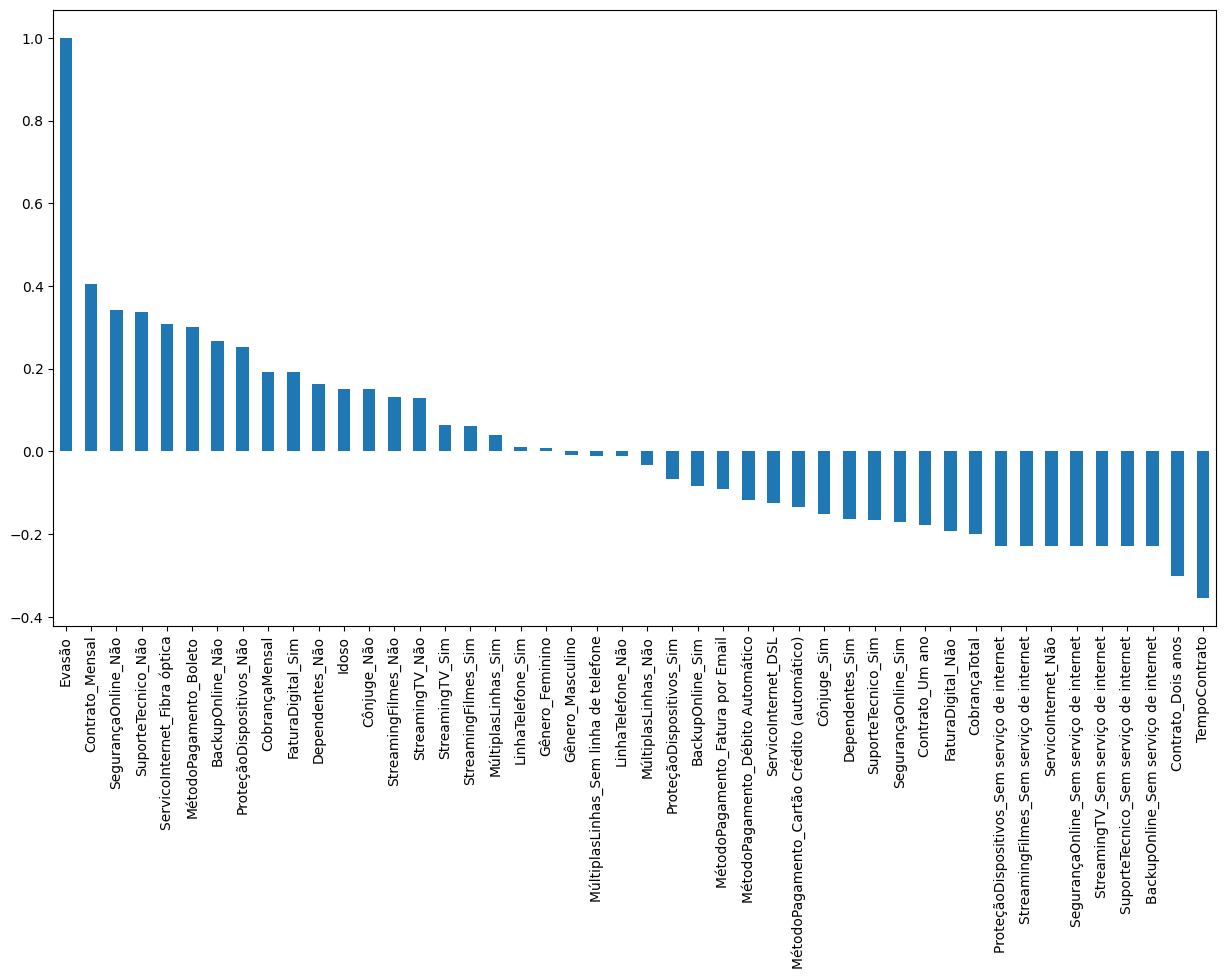

In [14]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Evasão'].sort_values(ascending = False).plot(kind='bar')

####`Contrato_Mensal`, ausência de `SegurançaOnline` e `SuporteTécnico` estão positivamente correlacionados evasão. Em contrapartida, `TempoContrato` longo, ter `Contrato` de `Dois anos` e `Sem serviço de internet` estão negativamente correlacionados com a evasão.

#### Curiosamente, serviços como `SegurançaOnline`, `StreamingTV`, `BackupOnline`, `SuporteTécnico`, etc. "sem conexão com a Internet" parecem estar negativamente correlacionados com a evaão.

#### Explore os padrões das correlações acima antes de se aprofundar na modelagem e na identificação das variáveis importantes para seu modelo.

## Rápida EDA (Análise Exploratória de Dados)

Comece primeiro explorando o conjunto de dados para compreender melhor os padrões nos dados e, potencialmente, formar algumas hipóteses. Comece examinando a distribuição de variáveis individuais e, em seguida, vasculhe os dados em busca de quaisquer tendências interessantes.

### 1. Demografia - Comece tentando entender o sexo, faixa etária, cônjuge e dependentes dos clientes


#### Qual a porcentagem de cliente Feminino e Masculino?

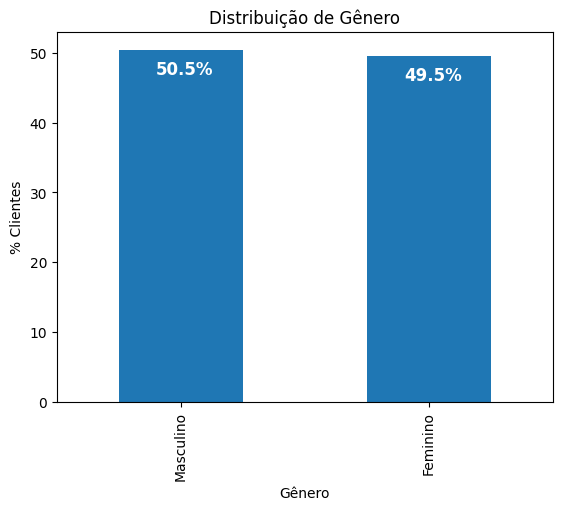

In [15]:
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['Gênero'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar')
ax.set_ylabel('% Clientes')
ax.set_xlabel('Gênero')
ax.set_ylabel('% Clientes')
ax.set_title('Distribuição de Gênero')

# Para decorar a barra da esquerda e colocar rótulos nas barras
# crie uma lista para coletar os dados de plt.patches
totals = []

# encontre os valores e acrescente à lista
for i in ax.patches:
    totals.append(i.get_width())

# defina rótulos de barras individuais usando a lista acima
total = sum(totals)

for i in ax.patches:
    # get_width empurra para a esquerda ou para a direita;
    # get_y empurra para cima ou para baixo
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')


### Qual é o gasto máximo e a média de gasto mensal entre os clientes do sexo feminino e masculino?

In [16]:
telecom_cust.groupby('Gênero')['CobrançaMensal'].agg(['mean', 'max'])

,mean,max
Gênero,,
Feminino,65.216652,118.75
Masculino,64.387546,118.35


### Quantos % são idosos?

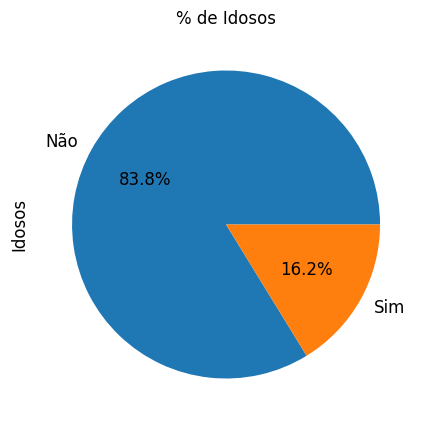

In [17]:
ax = (telecom_cust['Idoso'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['Não', 'Sim'],figsize =(5,5), fontsize = 12 )
ax.set_ylabel('Idosos',fontsize = 12)
ax.set_title('% de Idosos', fontsize = 12);

### Qual é o gasto máximo e a média de gasto mensal entre os clientes idosos?

In [18]:
telecom_cust.groupby('Idoso')['CobrançaMensal'].agg(['mean', 'max', 'median'])

,mean,max,median
Idoso,,,
0,61.885594,118.75,65.875
1,79.820359,117.45,84.850


### Quantos clientes tem cônjuge e quantos têm dependente?

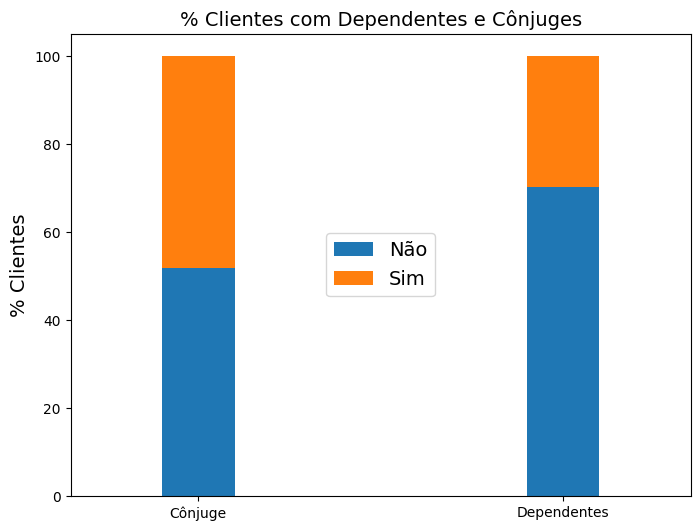

In [19]:
df2 = pd.melt(telecom_cust, id_vars=['IDCliente'], value_vars=['Dependentes','Cônjuge'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)

ax = df3.loc[:,'IDCliente'].plot.bar(stacked=True,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.set_ylabel('% Clientes',size = 14)
ax.set_xlabel('')
ax.set_title('% Clientes com Dependentes e Cônjuges',size = 14)
ax.legend(loc = 'center',prop={'size':14})

### Quem gasta mais entre os clientes com  com Conjuges e clientes sem Conjuges?

In [20]:
telecom_cust.groupby('Cônjuge')['CobrançaMensal'].agg(['mean', 'max', 'median'])

,mean,max,median
Cônjuge,,,
Não,61.956472,118.65,68.65
Sim,67.845977,118.75,74.85


## 2. TempoContrato e tipo de Contrato

### Obtenha a distribuição de clientes por `TempoContrato` e observe os resultados.

Text(0.5, 1.0, '# de Clientes pelo seu TempoContrato')

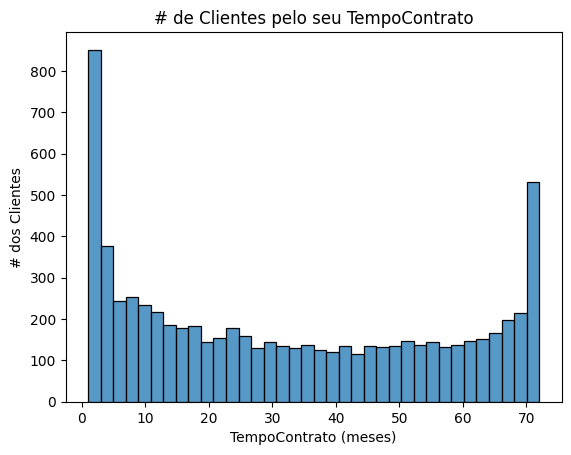

In [21]:
ax = sns.histplot(telecom_cust['TempoContrato'], bins=int(180/5))
ax.set_ylabel('# dos Clientes')
ax.set_xlabel('TempoContrato (meses)')
ax.set_title('# de Clientes pelo seu TempoContrato')

### Qual o tipo de contrato preferido pelos assinantes?

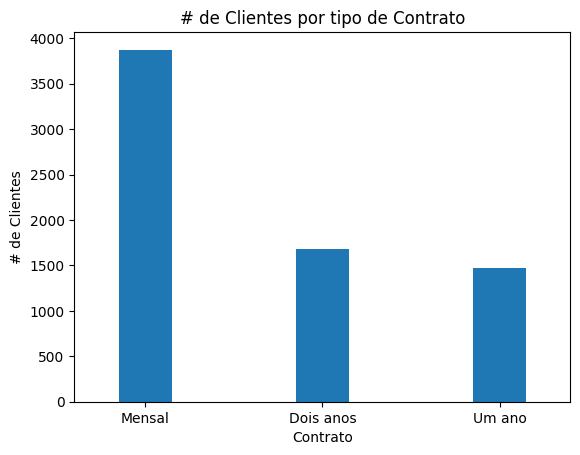

In [22]:
ax = telecom_cust['Contrato'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# de Clientes')
ax.set_title('# de Clientes por tipo de Contrato');

### Como o TempoContrato depende do tipo de Contrato?

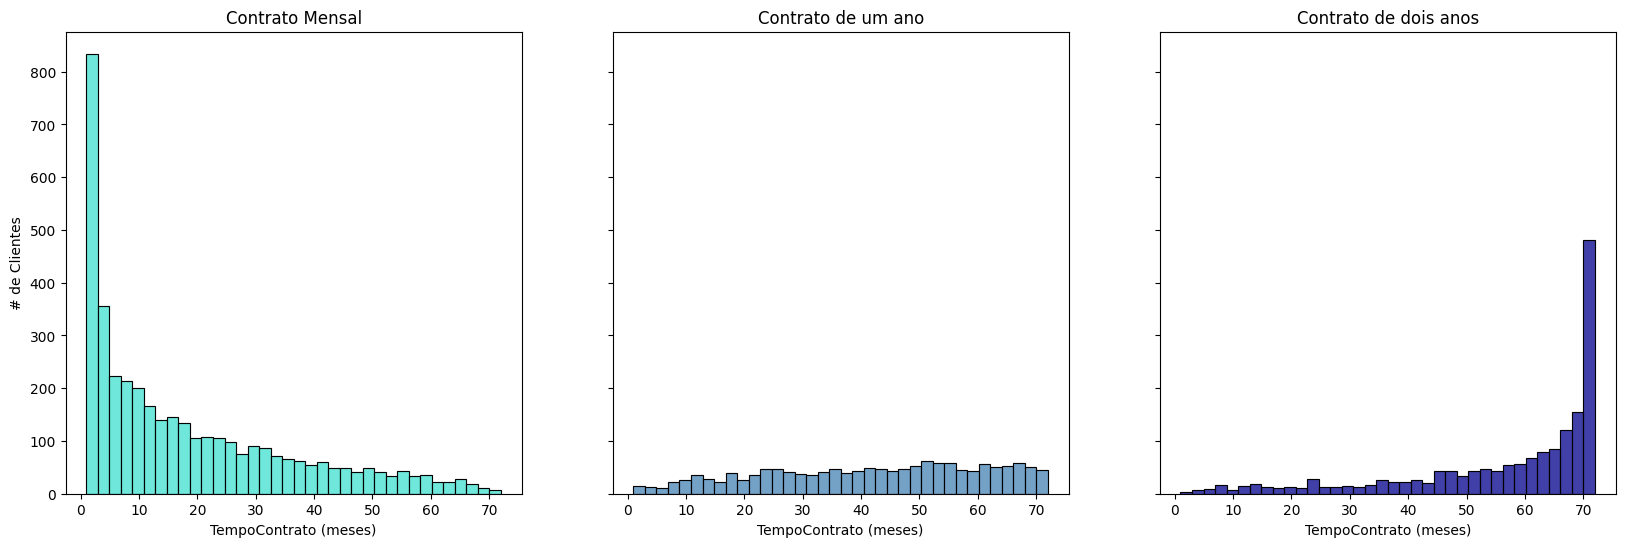

In [23]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.histplot(telecom_cust[telecom_cust['Contrato']=='Mensal']['TempoContrato'],
                   bins=int(180/5), color = 'turquoise',
                 ax=ax1)
ax.set_ylabel('# de Clientes')
ax.set_xlabel('TempoContrato (meses)')
ax.set_title('Contrato Mensal')

ax = sns.histplot(telecom_cust[telecom_cust['Contrato']=='Um ano']['TempoContrato'],
                   bins=int(180/5), color = 'steelblue',
                 ax=ax2)
ax.set_xlabel('TempoContrato (meses)')
ax.set_title('Contrato de um ano')

ax = sns.histplot(telecom_cust[telecom_cust['Contrato']=='Dois anos']['TempoContrato'],
                   bins=int(180/5), color = 'darkblue',
                 ax=ax3)

ax.set_xlabel('TempoContrato (meses)')
ax.set_title('Contrato de dois anos');


Os clientes do Contrato de 2 anos são mais leais: a maioria dos clientes mensais usa serviços por 1-2 meses no total, enquanto a maioria dos clientes do Contrato de 2 anos usa serviços por mais de 50 meses (> 4 anos).

## 3. E quanto aos serviços adicionais?

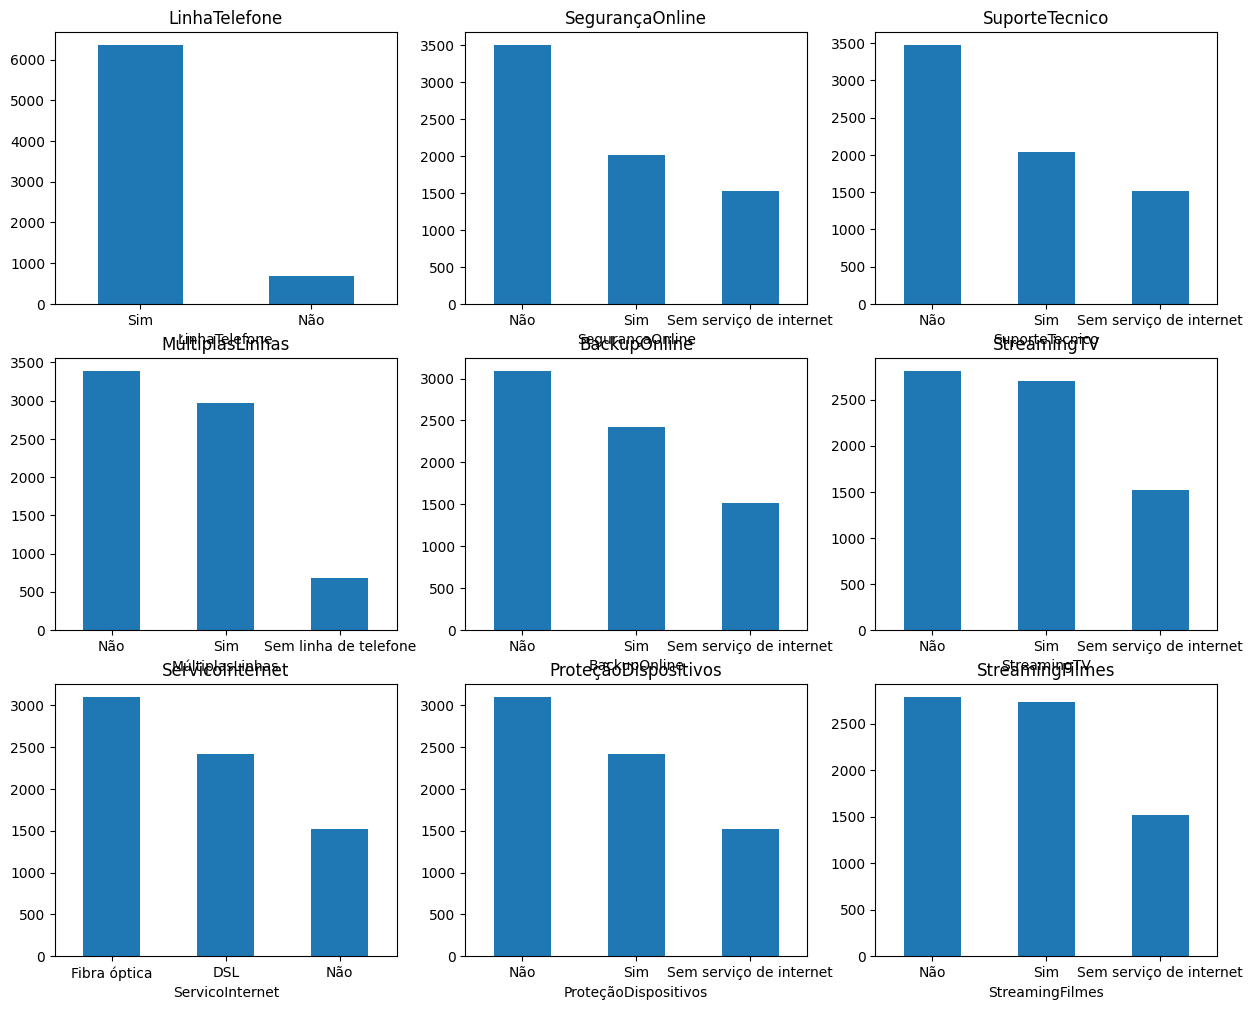

In [24]:
servicos = ['LinhaTelefone','MúltiplasLinhas','ServicoInternet','SegurançaOnline',
           'BackupOnline','ProteçãoDispositivos','SuporteTecnico','StreamingTV','StreamingFilmes']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(servicos):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)

    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)

    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)


### Existe diferença entre clientes idosos ou não, em relação à `ServicoInternet`?

In [25]:
telecom_cust.groupby('Idoso')['ServicoInternet'].value_counts() * 100/len(telecom_cust)

Idoso  ServicoInternet
0      Fibra óptica       32.209898
       DSL                30.674061
       Não                20.875995
1      Fibra óptica       11.817406
       DSL                 3.683163
       Não                 0.739477
Name: count, dtype: float64

### Observamos a mesma tendência para `SuporteTecnico`?

In [26]:
telecom_cust.groupby('Idoso')['SuporteTecnico'].value_counts()

Idoso  SuporteTecnico         
0      Não                        2642
       Sim                        1780
       Sem serviço de internet    1468
1      Não                         830
       Sim                         260
       Sem serviço de internet      52
Name: count, dtype: int64

# 4. E quanto à evasão (o que queremos analisar)?

### Qual percentual de clientes não evadem qual percentual que evadem?

In [27]:
telecom_cust['Evasão'].value_counts() / len(telecom_cust) * 100

Evasão
0    73.421502
1    26.578498
Name: count, dtype: float64

### Qual a média de `TempoContrato` entre os clientes que evadem e não evadem?

In [28]:
telecom_cust.groupby('Evasão').TempoContrato.agg(['mean', 'median', 'std'])

,mean,median,std
Evasão,,,
0,37.650010,38.0,24.076940
1,17.979133,10.0,19.531123


### Qual a média de evasão por tipo de `Contrato`?

In [29]:
telecom_cust.groupby('Contrato').Evasão.mean()

Contrato
Dois anos    0.028487
Mensal       0.427097
Um ano       0.112772
Name: Evasão, dtype: float64

In [30]:
df_dummies.head()
# telecom_cust["Idoso"].value_counts()[0]

,Idoso,TempoContrato,CobrançaMensal,CobrançaTotal,Evasão,Gênero_Feminino,Gênero_Masculino,Cônjuge_Não,Cônjuge_Sim,Dependentes_Não,...,StreamingFilmes_Sim,Contrato_Dois anos,Contrato_Mensal,Contrato_Um ano,FaturaDigital_Não,FaturaDigital_Sim,MétodoPagamento_Boleto,MétodoPagamento_Cartão Crédito (automático),MétodoPagamento_Débito Automático,MétodoPagamento_Fatura por Email
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,False,True,True,False,False,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,False,True,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,False,True,True,False,False,False,True,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,False,True,True,False,False,False


## Exercícios

a) Qual a taxa de evasão e não evasão entre os clientes idosos e não idosos? Plote um gráfico com esses dados.

In [33]:
# telecom_cust.groupby('Idoso').Evasão.sum()
idosos_evadidos = df_dummies.query("Idoso == 1 and Evasão == 1")["Idoso"].sum()
idosos_nao_evadidos = df_dummies.query("Idoso == 1 and Evasão == 0")["Idoso"].sum()
total_idosos = df_dummies.query("Idoso == 1")["Idoso"].sum()
nao_idosos_evadidos = df_dummies.query("Idoso == 0 and Evasão == 1")["Idoso"].sum
nao_idosos_nao_evadidos = df_dummies.query("Idoso == 0 and Evasão == 0")["Idoso"].sum
total_nao_idosos = df_dummies.query("Idoso == 0")["Idoso"].sum

print(f"A taxa de evasão de idosos é: {idosos_evadidos / total_idosos}")
print(f"A taxa de evasão de não idosos é: {nao_idosos_evadidos / total_nao_idosos}")

plt.pie([idosos_evadidos, idosos_nao_evadidos, nao_idosos_evadidos, nao_idosos_nao_evadidos], labels=['Idosos Evadidos', 'Idosos não Evadidos', 'Não Idosos Evadidos', 'Não Idosos Não Evadidos'])

UndefinedVariableError: name 'Truye' is not defined

b) Qual a distribuição de valores de cobrança mensal entre os clientes que evadiram?

In [32]:
plt.scatter(df_dummies['CobrançaMensal'])

TypeError: scatter() missing 1 required positional argument: 'y'

c) Qual a distribuição de valores de cobrança mensal entre os clientes que **não** evadiram?

d) Qual a distribuição de valores de cobrança total entre os clientes que evadiram e não evadiram? Plote um gráfico comparando os dois,

e) Plote um gráfico com a relação entre cobranças mensais e totais